In [44]:
import nibabel as nib
import cv2 as cv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Esse é o padrão que sera adotado para a padronização das imagens

In [75]:
def padroniza(ct,min):
    inicio = ct.shape[0] - min
    ct_padronizado = ct.get_fdata()[inicio:,:,:,:]
    
    return ct_padronizado

# Diretório das imagens 

Aqui definiremos o diretorio final das imagens apos o processo de padronização

In [76]:
os.mkdir('Dataset_Padronizado')

FileExistsError: [Errno 17] File exists: 'Dataset_Padronizado'

In [77]:
diretorio_final = os.path.join(os.getcwd(),'Dataset_Padronizado')

# Análise a respeito das fatias das Tomografias

In [138]:
df = pd.read_csv('metadados_reorganizado')

In [139]:
df.drop(df[df['Morbidity']=='Suspected'].index,inplace=True)

In [140]:
df.drop(df[df['Morbidity']=='Control'].index,inplace=True)

In [141]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Path
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,1,1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,3,3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,4,4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...
752,752,1253,HUST-Liyuan Hospital,Patient 883,65,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
753,753,1257,HUST-Liyuan Hospital,Patient 887,61,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
754,754,1258,HUST-Liyuan Hospital,Patient 888,56,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
755,755,1264,HUST-Liyuan Hospital,Patient 894,88,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [142]:
df['Morbidity'].value_counts()

Regula/Mild              364
Severe/Critically ill    203
Name: Morbidity, dtype: int64

In [143]:
path_imgs = df['Path'].values.tolist()

In [144]:
nomes_pat = df['Patient'].values.tolist()

In [145]:
#descobrindo a fatia minima
qt_fatias =  []
for arq in path_imgs:
    ct = nib.load(arq)
    qt_fatias.append(ct.get_fdata().shape[0])

In [146]:
min(qt_fatias)

51

In [147]:
df['Qt_fatias'] = qt_fatias

In [148]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Path,Qt_fatias
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181
1,1,1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,66
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405
3,3,3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,70
4,4,4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,65
...,...,...,...,...,...,...,...,...,...,...,...,...
752,752,1253,HUST-Liyuan Hospital,Patient 883,65,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,249
753,753,1257,HUST-Liyuan Hospital,Patient 887,61,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,241
754,754,1258,HUST-Liyuan Hospital,Patient 888,56,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,233
755,755,1264,HUST-Liyuan Hospital,Patient 894,88,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,274


<AxesSubplot:>

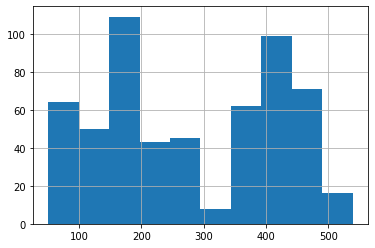

In [149]:
df['Qt_fatias'].hist()

In [150]:
df['Qt_fatias'].mean()

280.1675485008818

In [151]:
df_severe_critical = df[df["Morbidity"]== "Severe/Critically ill"]


In [152]:
df_regular_mild = df[df["Morbidity"] == "Regula/Mild"]

In [153]:
df_severe_critical['Qt_fatias'].min()

54

In [154]:
df_regular_mild['Qt_fatias'].min()

51

In [155]:
df_ana = df[df['Qt_fatias'] <150]

In [156]:
df_ana['Morbidity'].value_counts()

Regula/Mild              95
Severe/Critically ill    22
Name: Morbidity, dtype: int64

In [159]:
df.drop(df[df['Qt_fatias'] <150].index,inplace=True)

In [160]:
minimo = df['Qt_fatias'].min()

In [161]:
minimo

150

In [162]:
df['Morbidity'].value_counts()

Regula/Mild              269
Severe/Critically ill    181
Name: Morbidity, dtype: int64

In [163]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Path,Qt_fatias
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405
7,7,10,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308
9,9,12,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419
10,10,14,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419
...,...,...,...,...,...,...,...,...,...,...,...,...
752,752,1253,HUST-Liyuan Hospital,Patient 883,65,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,249
753,753,1257,HUST-Liyuan Hospital,Patient 887,61,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,241
754,754,1258,HUST-Liyuan Hospital,Patient 888,56,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,233
755,755,1264,HUST-Liyuan Hospital,Patient 894,88,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,274


In [164]:
df['Morbidity'].value_counts()

Regula/Mild              269
Severe/Critically ill    181
Name: Morbidity, dtype: int64

In [165]:
path_imgs = df['Path'].values.tolist()
path_nome = df['Patient'].values.tolist()

In [166]:
for arq,nome in zip(path_imgs,path_nome):
    ct = nib.load(arq)
    ct_pad = padroniza(ct,minimo)
    new_ct = nib.Nifti1Image(ct_pad,affine=None)
    nib.save(new_ct,os.path.join(diretorio_final,nome))

In [167]:
teste = nib.load(os.path.join(diretorio_final,path_nome[1]+'.nii'))

In [168]:
teste.get_fdata().shape

(150, 512, 512, 1)

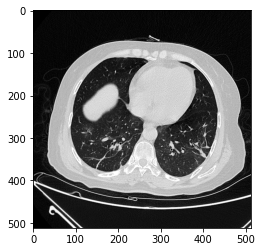

In [169]:
plt.imshow(teste.get_fdata()[10,:,:,:],cmap='gray')

In [170]:
diretorio_final

'/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado'

In [171]:
list_arq = os.listdir(diretorio_final)
caminho_padronizado = []
for arq in list_arq:
    caminho_padronizado.append(os.path.join(diretorio_final,arq))

In [172]:
caminho_padronizado

['/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1352.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 418.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 459.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 785.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1384.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 160.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1309.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1203.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 293.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 888.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 825.n

In [173]:
mapeamento = {nome[:-4]:path  for nome,path in zip(list_arq,caminho_padronizado)}

In [174]:
mapeamento

{'Patient 1352': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1352.nii',
 'Patient 418': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 418.nii',
 'Patient 459': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 459.nii',
 'Patient 785': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 785.nii',
 'Patient 1384': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1384.nii',
 'Patient 160': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 160.nii',
 'Patient 1309': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1309.nii',
 'Patient 1203': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1203.nii',
 'Patient 293': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 293.nii',
 'Patient 888': '/home/icaro/Faculdade

In [175]:
df['Caminho_padronizado'] = df['Patient'].map(mapeamento)

In [176]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Path,Qt_fatias,Caminho_padronizado
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
7,7,10,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
9,9,12,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
10,10,14,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,752,1253,HUST-Liyuan Hospital,Patient 883,65,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,249,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
753,753,1257,HUST-Liyuan Hospital,Patient 887,61,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,241,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
754,754,1258,HUST-Liyuan Hospital,Patient 888,56,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,233,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
755,755,1264,HUST-Liyuan Hospital,Patient 894,88,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,274,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [177]:
teste = nib.load(df['Caminho_padronizado'].iloc[0])

In [178]:
teste.get_fdata().shape

(150, 512, 512, 1)

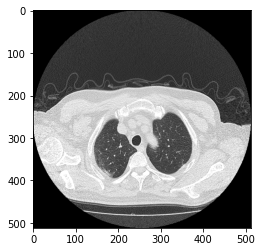

In [179]:
plt.imshow(teste.get_fdata()[10,:,:,:],cmap='gray')

In [180]:
df.to_csv('metadados_padronizados')